In [4]:
#import statements for visualization and data analysis
import pandas as pd
import numpy as np
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import seaborn as sns
import math
import random
from math import sqrt
from scipy import stats
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import pinv

## Initialize Data
Import 'athletes.csv' and store the data in a DataFrame

In [5]:
ath_data = pd.read_csv('athletes.csv', index_col=0)
dobs = ath_data['dob'].values
#calculates the person's age
ages = []
for i in range(dobs.size):
    dob = datetime.strptime((dobs[i]), '%m/%d/%Y')
    age = int((date.today()-dob.date()).days/365)
    ages.append(age)
#appends the list of age to the existing DataFrame
ath_data['age']=ages
#appends the total amount of medals earned from an athlete to the DataFrame
col_list=['gold', 'silver', 'bronze']
ath_data['totals'] = ath_data[col_list].sum(axis=1)

col_list = ['height', 'weight', 'age', 'sex']
physical=ath_data[col_list]
physical = physical[physical.height.notnull()]
physical = physical[physical.weight.notnull()]
physical['BMI'] = (physical[col_list].sum(axis=1))/(physical['height'])**2

col_list = ['height', 'weight']
physical2 = physical
physical2['sport'] = ath_data['sport']

# Investigation 1: Comparing Mean BMI Across Gymnastics, Aquatics, and Weightlifting

Is the mean height/weight distribution (i.e BMI) equal across aquatics, gymnastics, and weightlifting? If not, which sports have different means? 

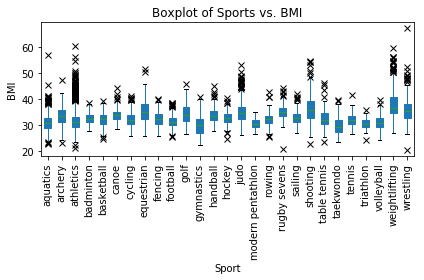

In [78]:
#plots boxplot of the BMI distribution by sports
plot = physical.boxplot(column = 'BMI', by='sport',  patch_artist=True,
    flierprops=dict(marker='x', color='cyan'))
plot.grid(False)
plot.set_xlabel('Sport')
plot.set_ylabel('BMI')
plt.title("Boxplot of Sports vs. BMI")
plt.suptitle("")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

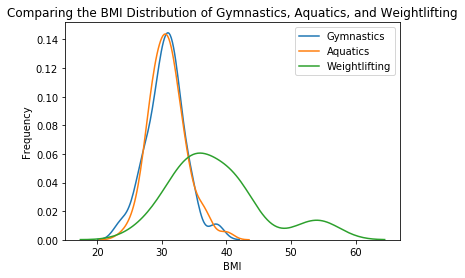

In [79]:
#pulls respective Series of aq/gy/wl athletes of their BMIs
gy = physical[physical['sport']=='gymnastics']['BMI']
aq = physical[physical['sport']=='aquatics']['BMI']
wl = physical[physical['sport']=='weightlifting']['BMI']
sampleintgy = [random.randint(0, gy.shape[0]-1) for i in range(int(.1*gy.shape[0]))]
sampleintaq = [random.randint(0, aq.shape[0]-1) for i in range(int(.1*aq.shape[0]))]
sampleintwl = [random.randint(0, wl.shape[0]-1) for i in range(int(.1*wl.shape[0]))]
gy = gy.iloc[sampleintgy]
aq = aq.iloc[sampleintaq]
wl = wl.iloc[sampleintwl]
#density plot of BMI distribution
sns.distplot(gy, hist=False, label='Gymnastics')
sns.distplot(aq, hist=False, label='Aquatics')
sns.distplot(wl, hist=False, label='Weightlifting')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title("Comparing the BMI Distribution of Gymnastics, Aquatics, and Weightlifting")
plt.show()

In [80]:
print("n1 =", len(sampleintgy))
print("n2 =", len(sampleintaq))
print("n3 =", len(sampleintwl))

n1 = len(sampleintgy)
n2 = len(sampleintaq)
n3 = len(sampleintwl)

gy_sum = sum(gy)
gy_sample_sq = gy**2
gy_sum_sq = sum(gy_sample_sq)
gy_avg = gy.mean()

aq_sum = sum(aq)
aq_sample_sq = aq**2
aq_sum_sq = sum(aq_sample_sq)
aq_avg = aq.mean()

wl_sum = sum(wl)
wl_sample_sq = wl**2
wl_sum_sq = sum(wl_sample_sq)
wl_avg = wl.mean()

total_sum = gy_sum+aq_sum+wl_sum

n1 = 31
n2 = 139
n3 = 25


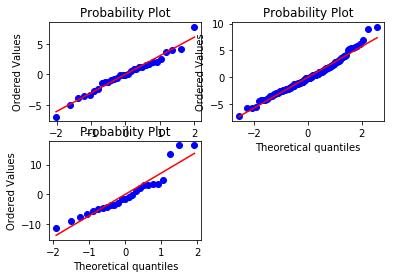

In [81]:
gy_residuals = gy-gy_avg
aq_residuals = aq-aq_avg
wl_residuals = wl-wl_avg
ax1 = plt.subplot(221)
stats.probplot(gy_residuals, plot=plt)
ax2 = plt.subplot(222)
stats.probplot(aq_residuals, plot=plt)
ax3 = plt.subplot(223)
stats.probplot(wl_residuals, plot=plt)
plt.show()

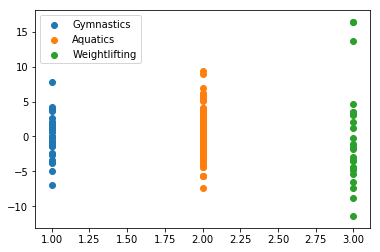

In [82]:
x = [1 for i in range(gy_residuals.shape[0])]
gym = plt.scatter(x, gy_residuals.values, label='Gymnastics')
x = [2 for i in range(aq_residuals.shape[0])]
aqu = plt.scatter(x, aq_residuals.values, label='Aquatics')
x = [3 for i in range(wl_residuals.shape[0])]
wei = plt.scatter(x, wl_residuals.values, label='Weightlifting')
plt.legend(handles=[gym, aqu, wei])
plt.show()

In [83]:
ss_total = (gy_sum_sq+aq_sum_sq+wl_sum_sq) - ((total_sum)**2)/(n1+n2+n3)
print("SS_total =", ss_total)
ss_treat = ((gy_sum**2)/n1+(aq_sum**2)/n2+(wl_sum**2)/n3) - ((total_sum)**2)/(n1+n2+n3)
print("SS_treatments =", ss_treat)
ss_error = ss_total-ss_treat
print("SS_error =", ss_error)

ms_treat = ss_treat/2
print("MS_treatments =", ms_treat)
ms_error = ss_error/((n1+n2+n3)-2)
print("MS_error =", ms_error)
F0 = ms_treat/ms_error
print("Test statistic =", F0)

SS_total = 3903.76623784
SS_treatments = 1272.7589348
SS_error = 2631.00730304
MS_treatments = 636.379467401
MS_error = 13.6321621919
Test statistic = 46.6822106752


In [84]:
print("Gymnastics Average BMI:", gy_avg)
print("Aquatics Average BMI:", aq_avg)
print("Weightlifting Average BMI:", wl_avg)

LSD_gyaq = 1.972*sqrt(ms_error*(1/n1+1/n2))
gyaq_diff = abs(gy_avg-aq_avg)
print("Mean difference of average BMI between Gymnastics and Aquatics is", gyaq_diff)
print("LSD of Gymnastics and Aquatics is", LSD_gyaq)

LSD_gywl = 1.972*sqrt(ms_error*(1/n1+1/n3))
gywl_diff = abs(gy_avg-wl_avg)
print("Mean difference of average BMI between Gymnastics and Weightlifting is", gywl_diff)
print("LSD of Gymnastics and Weightlifting is", LSD_gywl)


LSD_aqwl = 1.972*sqrt(ms_error*(1/n2+1/n3))
aqwl_diff = abs(aq_avg-wl_avg)
print("Mean difference of average BMI between Aquatics and Weightlifting is", aqwl_diff)
print("LSD of Aquatics and Weightlifting is", LSD_aqwl)

Gymnastics Average BMI: 30.6090364501
Aquatics Average BMI: 30.8733894514
Weightlifting Average BMI: 38.4616688617
Mean difference of average BMI between Gymnastics and Aquatics is 0.264353001303
LSD of Gymnastics and Aquatics is 1.4461904740385871
Mean difference of average BMI between Gymnastics and Weightlifting is 7.85263241152
LSD of Gymnastics and Weightlifting is 1.9571875530052536
Mean difference of average BMI between Aquatics and Weightlifting is 7.58827941022
LSD of Aquatics and Weightlifting is 1.5817352834614762


## INVESTIGATION 2: Determining Relationship Between GDP, Participants, and Medals Won

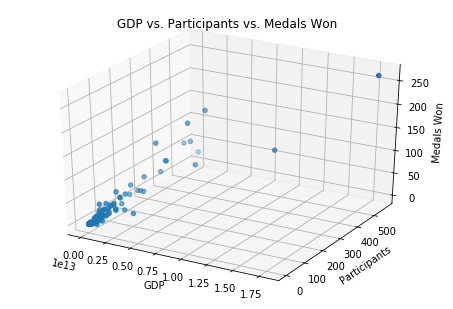

In [179]:
ath_data_copy = ath_data
country_data = pd.read_csv('countries.csv', index_col=0)
country_data['gdp']=country_data['gdp_per_capita']*country_data['population']
country_data = country_data.drop('gdp_per_capita', 1)
country_data = country_data.rename(index = str, columns={"code":"nationality"})
ath_data_copy = ath_data_copy.merge(country_data, on='nationality', how='left')
ath_data_copy = ath_data_copy.sort_values(by='gdp')
ath_data_copy = ath_data_copy[ath_data_copy.gdp.notnull()]
gdp_data = ath_data_copy.groupby(by="gdp")['totals'].agg(['count', 'sum'])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs=gdp_data.index, ys= gdp_data['count'], zs=gdp_data['sum'], marker='o')
ax.set_xlabel('GDP')
ax.set_ylabel('Participants')
ax.set_zlabel('Medals Won')
plt.title("GDP vs. Participants vs. Medals Won")
plt.show()

B0 = -2.9481511314
B1 = 8.254217349e-12
B2 = 0.170736770254
Fitted Linear Regression Model: medals_pred = -2.948 + 8.254217349e-12*GDP + 0.171*Participants
sigmasq = 134.695368088
95% CI of B1 is [6.84841639149e-12,9.66001830651e-12].
95% CI of B2 is [0.148252468415,0.193221072094].
Therefore, because 0 is not included in either confidence intervals, both features (GDP and number of participants) are statistically significant.
R^2 =  0.880472589569


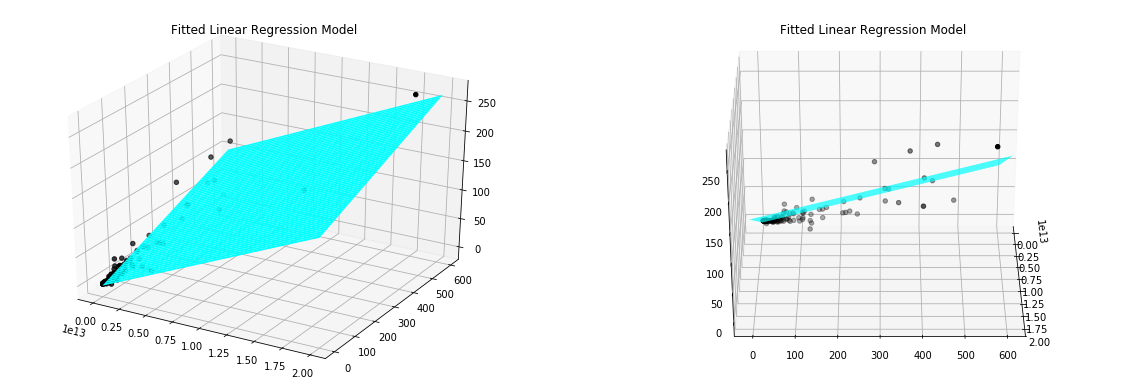

In [215]:
n = len(gdp_data.index.values)
x1 = gdp_data.index.values.reshape(n,1)
x2 = gdp_data['count'].values.reshape(n,1)
ones = np.ones((n, 1), dtype=int)
X = np.concatenate((ones, x1, x2), axis=1)
y = gdp_data['sum'].values.reshape(n,1)

xtxinv = np.linalg.inv(np.dot(X.T, X))
b = np.dot(np.dot(xtxinv, X.T), y)
print("B0 =", b[0][0])
print("B1 =", b[1][0])
print("B2 =", b[2][0])
print("Fitted Linear Regression Model: medals_pred = ", round(b[0][0], 3)," + ", b[1][0],"*GDP + ", round(b[2][0], 3), 
      "*Participants", sep='')

SSE = np.dot(y.T, y)-np.dot(np.dot(b.T, X.T), y)
sigmasq = SSE/(n-3) 
print("sigmasq =", sigmasq[0][0])
C = np.linalg.inv(np.dot(X.T, X))
b1_lower = b[1][0]-1.974*sqrt(sigmasq*C[1][1])
b1_upper = b[1][0]+1.974*sqrt(sigmasq*C[1][1])
print("95% CI of B1 is [",b1_lower, ",", b1_upper, "].", sep='')
b2_lower = b[2][0]-1.974*sqrt(sigmasq*C[2][2])
b2_upper = b[2][0]+1.974*sqrt(sigmasq*C[2][2])
print("95% CI of B2 is [",b2_lower, ",", b2_upper, "].", sep='')
print("Therefore, because 0 is not included in either confidence intervals, both features (GDP and number of participants)\
 are statistically significant.")
SST = SSE + np.dot(np.dot(b.T, X.T), y)
print("R^2 = ", 1-(SSE/SST)[0][0])

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(221, projection='3d')
xx, yy = np.meshgrid(range(0, int(2e13), int(1e11)), range(600))
z = b[0][0]+b[1][0]*xx+b[2][0]*yy
ax.plot_surface(xx, yy, z, color='cyan', rstride=10, cstride=10, shade=False)
ax.scatter(xs=gdp_data.index, ys= gdp_data['count'], zs=gdp_data['sum'], marker='o', color='black')
plt.title("Fitted Linear Regression Model")

ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_surface(xx, yy, z, color='cyan', rstride=10, cstride=10, shade=False)
ax2.scatter(xs=gdp_data.index, ys= gdp_data['count'], zs=gdp_data['sum'], marker='o', color='black')
plt.title("Fitted Linear Regression Model")
ax2.view_init(azim=360)
plt.show()

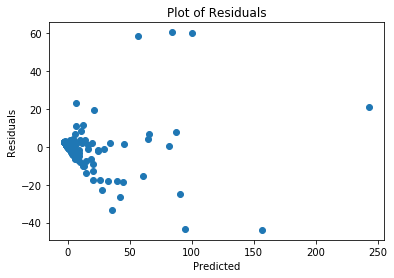

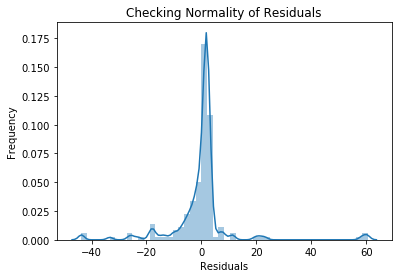

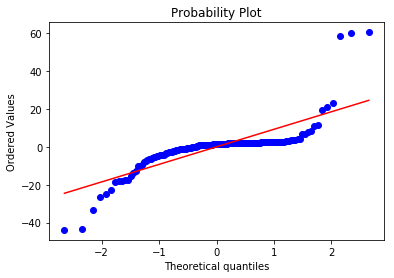

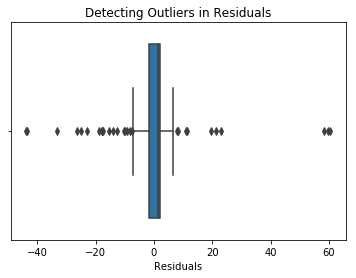

In [216]:
yhat = b[0][0]+b[1][0]*x1+b[2][0]*x2
residuals = y-yhat
plt.scatter(yhat, residuals)
plt.title("Plot of Residuals")
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()
sns.distplot(residuals, hist=True)
plt.title("Checking Normality of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()
stats.probplot(residuals.T[0], plot=plt)
plt.show()
sns.boxplot(residuals)
plt.title("Detecting Outliers in Residuals")
plt.xlabel('Residuals')
plt.show()

B0 = -1.69714550936
B1 = 3.69931707676e-12
B2 = 0.149460048144
B3 = 2.41768698958e-07
Fitted Polynomial Regression Model: medals_pred = -1.697 + 3.69931707676e-12*GDP + 0.149*Participants + 2.41768698958e-07*Participants^3
sigmasq = 5.86699973489
95% CI of B1 is [7.767010926e-13,6.62193306092e-12].
95% CI of B2 is [0.135815345994,0.163104750294].
95% CI of B3 is [1.47978077257e-07,3.35559320659e-07].
Therefore, because 0 is not included in any confidence intervals, all features are statistically significant.


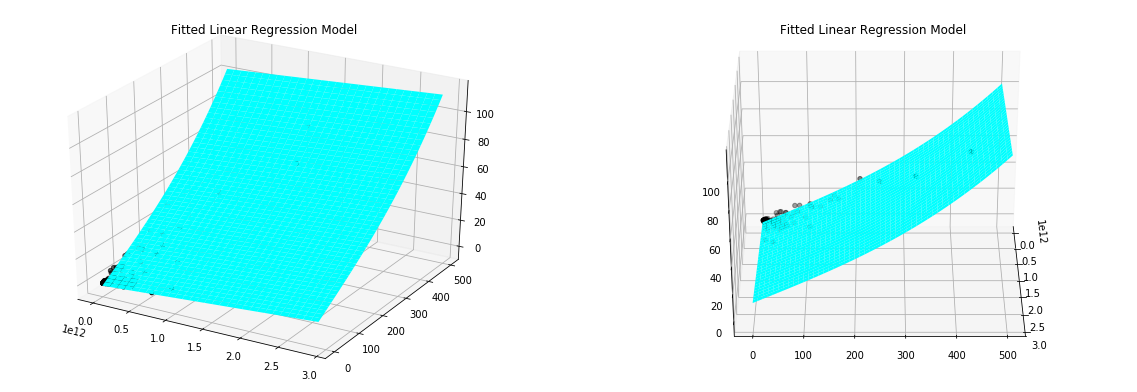

In [217]:
y = y[~(residuals>5) & ~(residuals<-10)]
n=len(y)
y = y.reshape(n, 1)
x1 = x1[~(residuals>5) & ~(residuals<-10)].reshape(n,1)
x2 = x2[~(residuals>5) & ~(residuals<-10)].reshape(n,1)
z1 = (x2**3).reshape(n,1)
ones = np.ones((len(y), 1), dtype=int)
X = np.concatenate((ones, x1, x2, z1), axis=1)
xtxinv = np.linalg.inv(np.dot(X.T, X))
b = np.dot(np.dot(xtxinv, X.T), y)

for i in list(range(0,4)):
    print("B", i, " = ", b[i][0], sep='')
    
print("Fitted Polynomial Regression Model: medals_pred = ", round(b[0][0], 3)," + ", b[1][0],"*GDP + ", round(b[2][0], 3), 
      "*Participants + ", b[3][0], "*Participants^3", sep='')

yhat = b[0][0]+b[1][0]*x1+b[2][0]*x2+b[3][0]*z1
residuals = y-yhat

SSE = np.dot(y.T, y)-np.dot(np.dot(b.T, X.T), y)
sigmasq = SSE/(n-3) 
print("sigmasq =", sigmasq[0][0])
C = np.linalg.inv(np.dot(X.T, X))

for i in list(range(1,4)):
    b_lower = b[i][0]-1.977*sqrt(sigmasq*C[i][i])
    b_upper = b[i][0]+1.977*sqrt(sigmasq*C[i][i])
    print("95% CI of B", i, " is [", b_lower, ",", b_upper, "].", sep='')
    
print("Therefore, because 0 is not included in any confidence intervals, all features are statistically significant.")

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(221, projection='3d')
xx, yy = np.meshgrid(range(0, int(3e12), int(1e11)), range(500))
z = b[0][0]+b[1][0]*xx+b[2][0]*yy+b[3][0]*(yy**3)
ax.plot_surface(xx, yy, z, color='cyan', shade=False)
plt.title("Fitted Linear Regression Model")
ax.scatter(xs=x1, ys= x2, zs=y, marker='o', color='black')

ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_surface(xx, yy, z, color='cyan', shade=False)
ax2.scatter(xs=x1, ys= x2, zs=y, marker='o', color='black')
plt.title("Fitted Linear Regression Model")
ax2.view_init(azim=360)
plt.show()

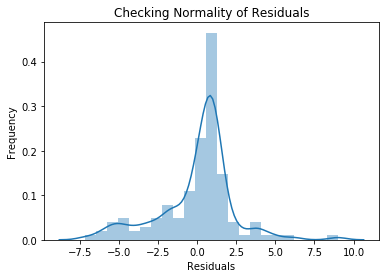

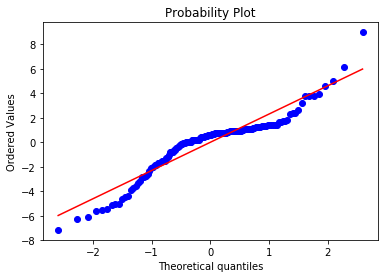

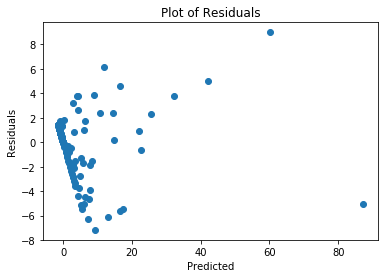

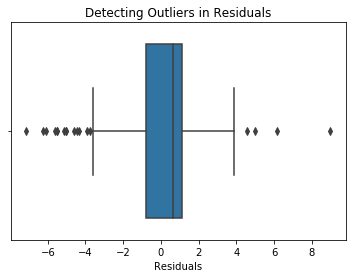

In [218]:
sns.distplot(residuals, hist=True)
plt.title("Checking Normality of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()
stats.probplot(residuals.T[0], plot=plt)
plt.show()

plt.scatter(yhat, residuals)
plt.title("Plot of Residuals")
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

sns.boxplot(residuals)
plt.title("Detecting Outliers in Residuals")
plt.xlabel('Residuals')
plt.show()

# INVESTIGATION 3: Comparing Mean Age of Male/Female Medalists in Gymnastics

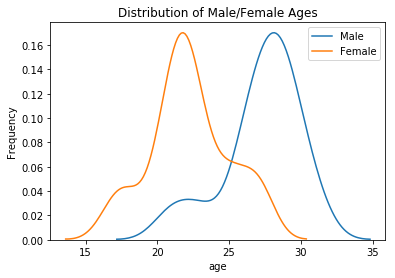

In [222]:
gymnastics = ath_data[ath_data['sport']=='gymnastics']
gymnastics_m = gymnastics[gymnastics['sex']=='male']
gymnastics_f = gymnastics[gymnastics['sex']=='female']
sampleintgy_m = [random.randint(0, gymnastics_m.shape[0]-1) for i in
    range(int(.5*gymnastics_m.shape[0]))]
sampleintgy_f = [random.randint(0, gymnastics_f.shape[0]-1) for i in
    range(int(.5*gymnastics_f.shape[0]))]
gymnastics_m = gymnastics_m.iloc[sampleintgy_m]
gymnastics_f = gymnastics_f.iloc[sampleintgy_f]
gymnastics_winners_m = gymnastics_m[gymnastics_m['totals']>0]['age']
gymnastics_winners_f = gymnastics_f[gymnastics_f['totals']>0]['age']
sns.distplot(gymnastics_winners_m, hist=False, label='Male')
sns.distplot(gymnastics_winners_f, hist=False, label='Female')
plt.title("Distribution of Male/Female Ages")
plt.ylabel('Frequency')
plt.show()

In [223]:
gymnastics = ath_data[ath_data['sport']=='gymnastics']
gymnastics_m = gymnastics[gymnastics['sex']=='male']
gymnastics_f = gymnastics[gymnastics['sex']=='female']
sampleintgy_m = [random.randint(0, gymnastics_m.shape[0]-1) for i in
    range(int(.5*gymnastics_m.shape[0]))]
sampleintgy_f = [random.randint(0, gymnastics_f.shape[0]-1) for i in
    range(int(.5*gymnastics_f.shape[0]))]
gymnastics_m = gymnastics_m.iloc[sampleintgy_m]
gymnastics_f = gymnastics_f.iloc[sampleintgy_f]
gymnastics_winners_m = gymnastics_m[gymnastics_m['totals']>0]['age']
gymnastics_winners_f = gymnastics_f[gymnastics_f['totals']>0]['age']
print("Average age of male gymnastics medalists:", gymnastics_winners_m.mean())
print("Average age of female gymnastics medalists:", gymnastics_winners_f.mean())
print("Standard deviation of ages of male gymnastics medalists:", gymnastics_winners_m.std())
print("Standard deviation of ages of female gymnastics medalists:", gymnastics_winners_f.std())
print("n_male =", gymnastics_winners_m.shape[0])
print("n_female =", gymnastics_winners_f.shape[0])

Average age of male gymnastics medalists: 25.5454545455
Average age of female gymnastics medalists: 21.85
Standard deviation of ages of male gymnastics medalists: 2.65945995885
Standard deviation of ages of female gymnastics medalists: 3.54334067765
n_male = 11
n_female = 20


# INVESTIGATION 4: Analyzing Heights/Weights Between Male/Female Athletes

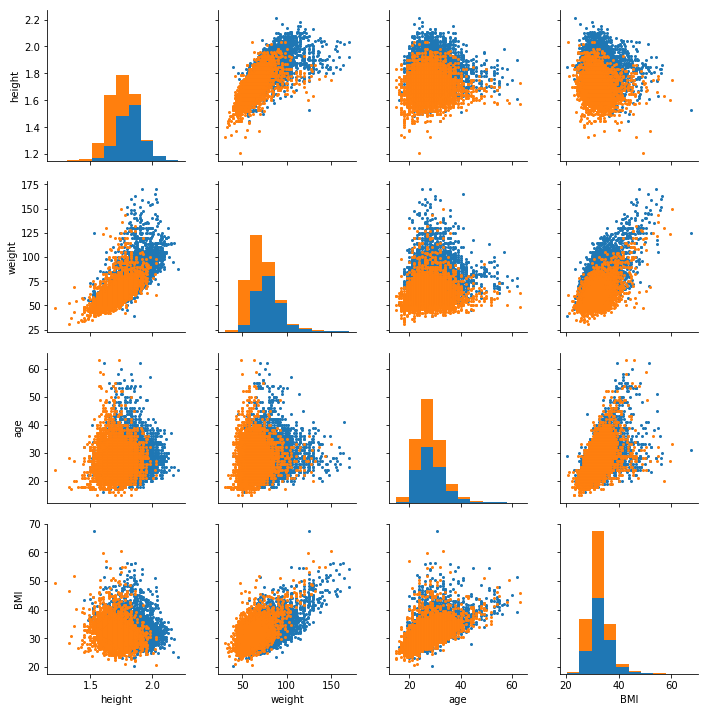

In [88]:
#pulls the height/weight/age/sex of athletes; removes athletes with NaN
#values in any height/weight columns
#plots a scatterplot matrix to observe relationship between features
plot = sns.PairGrid(physical, hue='sex')
plot = plot.map_diag(plt.hist)
plot = plot.map_offdiag(plt.scatter, s = 4)
#sns.pairplot(physical)
plt.show()

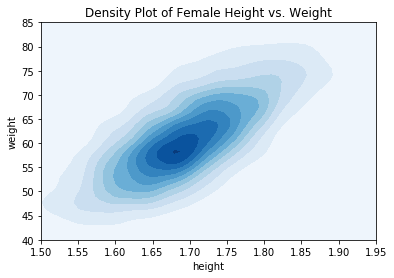

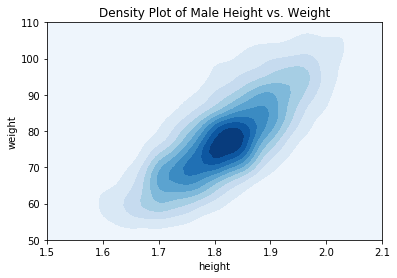

In [89]:
#plots density plot of female/male height vs. weight
physical_f=physical[physical['sex']=='female']
physical_m=physical[physical['sex']=='male']
sns.kdeplot(physical_f.height, physical_f.weight, cmap="Blues", shade=True)
plt.xlim(1.5, 1.95)
plt.ylim(40, 85)
plt.title('Density Plot of Female Height vs. Weight')
plt.show()
sns.kdeplot(physical_m.height, physical_m.weight, cmap="Blues", shade=True)
plt.xlim(1.5, 2.1)
plt.title('Density Plot of Male Height vs. Weight')
plt.ylim(50,110)
plt.show()

In [138]:
male = physical[physical['sex']=='male']
female = physical[physical['sex']=='female']
sampleint_m = [random.randint(0, male.shape[0]-1) for i in
    range(int(.5*male.shape[0]))]
sampleint_f = [random.randint(0, female.shape[0]-1) for i in
    range(int(.5*female.shape[0]))]
male = male.iloc[sampleint_m]
female = female.iloc[sampleint_f]
print("num_males = ", len(sampleint_m))
print("num_females = ", len(sampleint_f))
print("Male average height is ", male['height'].mean())
print("Female average height is ", female['height'].mean())
print("Male height standard deviation is ", male['height'].std())
print("Female height standard deviation is ", female['height'].std())

num_males =  2931
num_females =  2498
Male average height is  1.82363357216
Female average height is  1.69742994396
Male height standard deviation is  0.102126874276
Female height standard deviation is  0.0879301891154


In [139]:
print("Male average weight is ", male['weight'].mean())
print("Female average weight is ", female['weight'].mean())
print("Male weight standard deviation is ", male['weight'].std())
print("Female weight standard deviation is ", female['weight'].std())

Male average weight is  79.9099283521
Female average weight is  62.5940752602
Male weight standard deviation is  15.646524449
Female weight standard deviation is  11.5126715776


# INVESTIGATION 5: Comparing Variability of Ages of Equestrians and Gymnasts

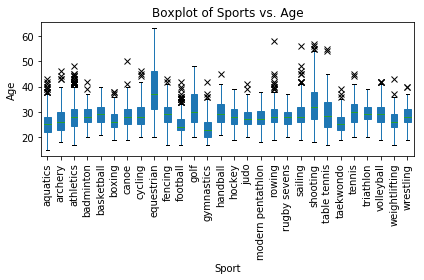

In [52]:
plot = ath_data.boxplot(column='age', by='sport', patch_artist=True,
    flierprops=dict(marker='x', color='cyan'))
plot.grid(False)
plot.set_xlabel('Sport')
plot.set_ylabel('Age')
plt.title("Boxplot of Sports vs. Age")

plt.suptitle("")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

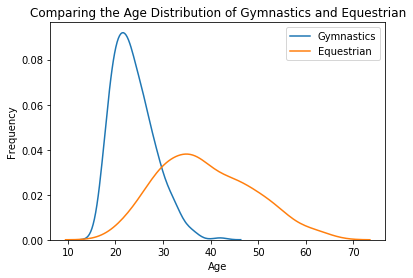

In [53]:
#pulls respective Series of the equestrian/gymnastics athletes of their ages
gymnastics_age = gymnastics['age']
equestrian = ath_data[ath_data['sport']=='equestrian']
equestrian_age = equestrian['age']
#density plot of the age distribution
sns.distplot(gymnastics_age, hist=False, label='Gymnastics')
sns.distplot(equestrian_age, hist=False, label='Equestrian')
plt.title("Comparing the Age Distribution of Gymnastics and Equestrian")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [54]:
gymnastics_age = gymnastics['age']
equestrian = ath_data[ath_data['sport']=='equestrian']
equestrian_age = equestrian['age']
sampleint_gy = [random.randint(0, gymnastics_age.shape[0]-1) for i in
    range(int(.5*gymnastics_age.shape[0]))]
sampleint_eq = [random.randint(0, equestrian_age.shape[0]-1) for i in
    range(int(.5*equestrian_age.shape[0]))]
gymnastics_age = gymnastics_age.iloc[sampleint_gy]
equestrian_age = equestrian_age.iloc[sampleint_eq]

print("n_gymnasts =", gymnastics_age.shape[0])
print("n_equestrians =", equestrian_age.shape[0])
print("Mean of gymnast ages is", gymnastics_age.mean())
print("Mean of equestrian ages is", equestrian_age.mean())
print("Standard deviation of gymnast ages is", gymnastics_age.std())
print("Standard deviation of equestrian ages is", equestrian_age.std())

n_gymnasts = 162
n_equestrians = 111
Mean of gymnast ages is 23.5432098765
Mean of equestrian ages is 39.4234234234
Standard deviation of gymnast ages is 4.24424896301
Standard deviation of equestrian ages is 9.57415987252


Best values of the parameters for the SVM are {'C': 10, 'kernel': 'linear'} with an accuracy of 0.876146788991


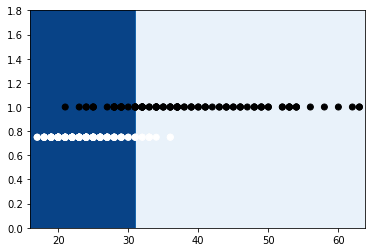

In [63]:
data = gymnastics.append(equestrian)
sample_gym = [random.randint(0, gymnastics.shape[0]) for i in
    range(int(.8*gymnastics.shape[0]))]
sample_test_gym = []
for i in list(range(gymnastics.shape[0])):
    if i not in sample_gym:
        sample_test_gym.append(i)
train = data.iloc[sample_gym]
ones = [1 for i in range(train.shape[0])]
train['label'] = ones
test = data.iloc[sample_test_gym]
n1 = len(sample_test_gym)
sample_eq = [gymnastics.shape[0]-1+random.randint(0, equestrian.shape[0]) for i in
    range(int(.8*equestrian.shape[0]))]
sample_test_eq = []
list_range = list(range(gymnastics.shape[0]-1, gymnastics.shape[0]-1+equestrian.shape[0]))
for i in list_range:
    if i not in sample_eq:
        sample_test_eq.append(i)
eq_train = data.iloc[sample_eq]
zeros = [0 for i in range(eq_train.shape[0])]
eq_train['label']=zeros
train = train.append(eq_train)
eq_test = data.iloc[sample_test_eq]
test = test.append(eq_test)

param_grid = {'C': [1, 5, 10, 50], 'kernel': ['linear']},
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(train['age'].values.reshape(-1,1), train['label'])
print("Best values of the parameters for the SVM are", grid.best_params_, "with an accuracy of", grid.best_score_)
predict = grid.predict(test['age'].values.reshape(-1,1))

h = 0.2
x_min, x_max = min(test['age']) - 1, max(test['age']) + 1
y_min, y_max = 0, 2
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))

Z = grid.predict(np.c_[xx.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap="Blues")
ones = [1 for i in range(test.shape[0])]
color= ['black' if l == 'equestrian' else 'white' for l in test['sport']]
vec = []
for i in list(range(test.shape[0])):
    if test['sport'].iloc[i]=='gymnastics':
        vec.append(0.75)
    else:
        vec.append(1)
plt.scatter(test['age'].values, vec, c=color, cmap=plt.cm.Paired)
plt.figure
plt.show()

# INVESTIGATION 6: Comparing Proportion of Male and Female Medalists

In [56]:
males = ath_data[ath_data['sex']=='male']
females = ath_data[ath_data['sex']=='female']
sampleint_m = [random.randint(0, males.shape[0]-1) for i in
    range(int(.5*males.shape[0]))]
sampleint_f = [random.randint(0, females.shape[0]-1) for i in
    range(int(.5*females.shape[0]))]
males = males.iloc[sampleint_m]
females = females.iloc[sampleint_f]
male_winners = males[males['totals']>0]
female_winners = females[females['totals']>0]
print("n_males =", males.shape[0])
print("n_females =", females.shape[0])
print("Proportion of male medalists:", male_winners.shape[0]/males.shape[0])
print("Proportion of female medalists:", female_winners.shape[0]/females.shape[0])

n_males = 3166
n_females = 2602
Proportion of male medalists: 0.15476942514213518
Proportion of female medalists: 0.16986933128362797
